In [2]:
from ISLP import load_data
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Cargar datos igual que en la primer entrega
NCI60 = load_data('NCI60')
nc_data = NCI60['data']
nc_labels = NCI60['labels']

# Igual que en la primer entrega estandarizo los datos
scaler_nci = StandardScaler()
X_nci_scaled = scaler_nci.fit_transform(nc_data)


In [4]:
from sklearn.preprocessing import StandardScaler

# Transponer la matriz
X_genes = nc_data.T 

scaler_genes = StandardScaler()
X_genes_scaled = scaler_genes.fit_transform(X_genes)

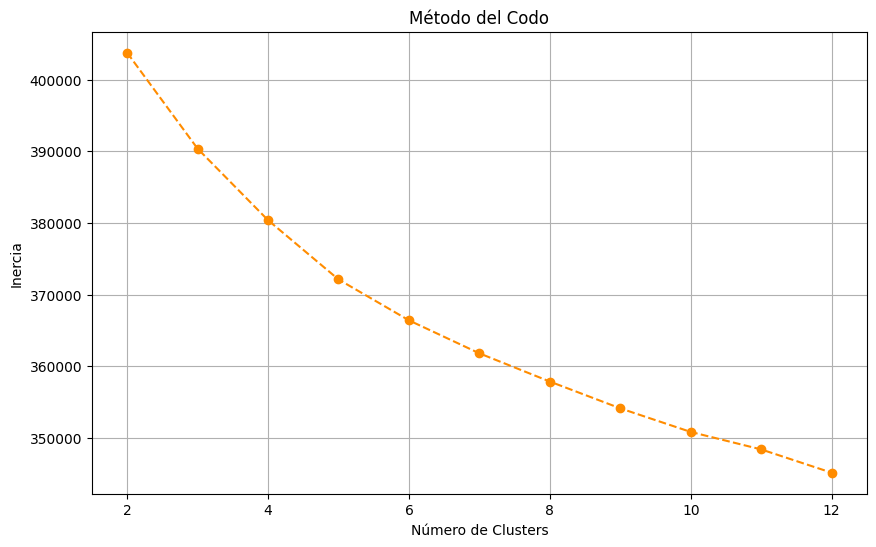

In [9]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inercias = []
rango_k = range(2, 13) 


for k in rango_k:
    kmeans = KMeans(n_clusters=k, random_state=19, n_init=10) 
    kmeans.fit(X_genes_scaled)
    inercias.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(rango_k, inercias, marker='o', linestyle='--', color='darkorange')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.grid(True)
plt.show()

Nuevamente el metodo del codo nos dio una grafica muy suave, mantendremos el numero en 4.

In [8]:
from sklearn.metrics import adjusted_rand_score
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids 
import numpy as np


k_genes = 4

# K-Means
kmeans_genes = KMeans(n_clusters=k_genes, random_state=19, n_init=10)
labels_km_genes = kmeans_genes.fit_predict(X_genes_scaled)

# PAM 
pam_genes = KMedoids(n_clusters=k_genes, metric='manhattan', init='k-medoids++', random_state=19)
labels_pam_genes = pam_genes.fit_predict(X_genes_scaled)

# Rand Adjustado
ari_genes = adjusted_rand_score(labels_km_genes, labels_pam_genes)

print(f"Resultados Genes (k={k_genes})")
print(f"Índice Rand Ajustado (ARI): {ari_genes:.4f}")

Resultados Genes (k=4)
Índice Rand Ajustado (ARI): 0.1018


El Índice de Rand Ajustado dio un valor de 0.1 al agrupar genes. Esto, sumado a que la gráfico del codo no mostraba un quiebre claro. Indica que la estructura de agrupación de los genes es mas varuada y continua que la de los pacientes, provocando que K-Means y PAM generen particiones variadas al no encontrar patrones claro para $k=4$.

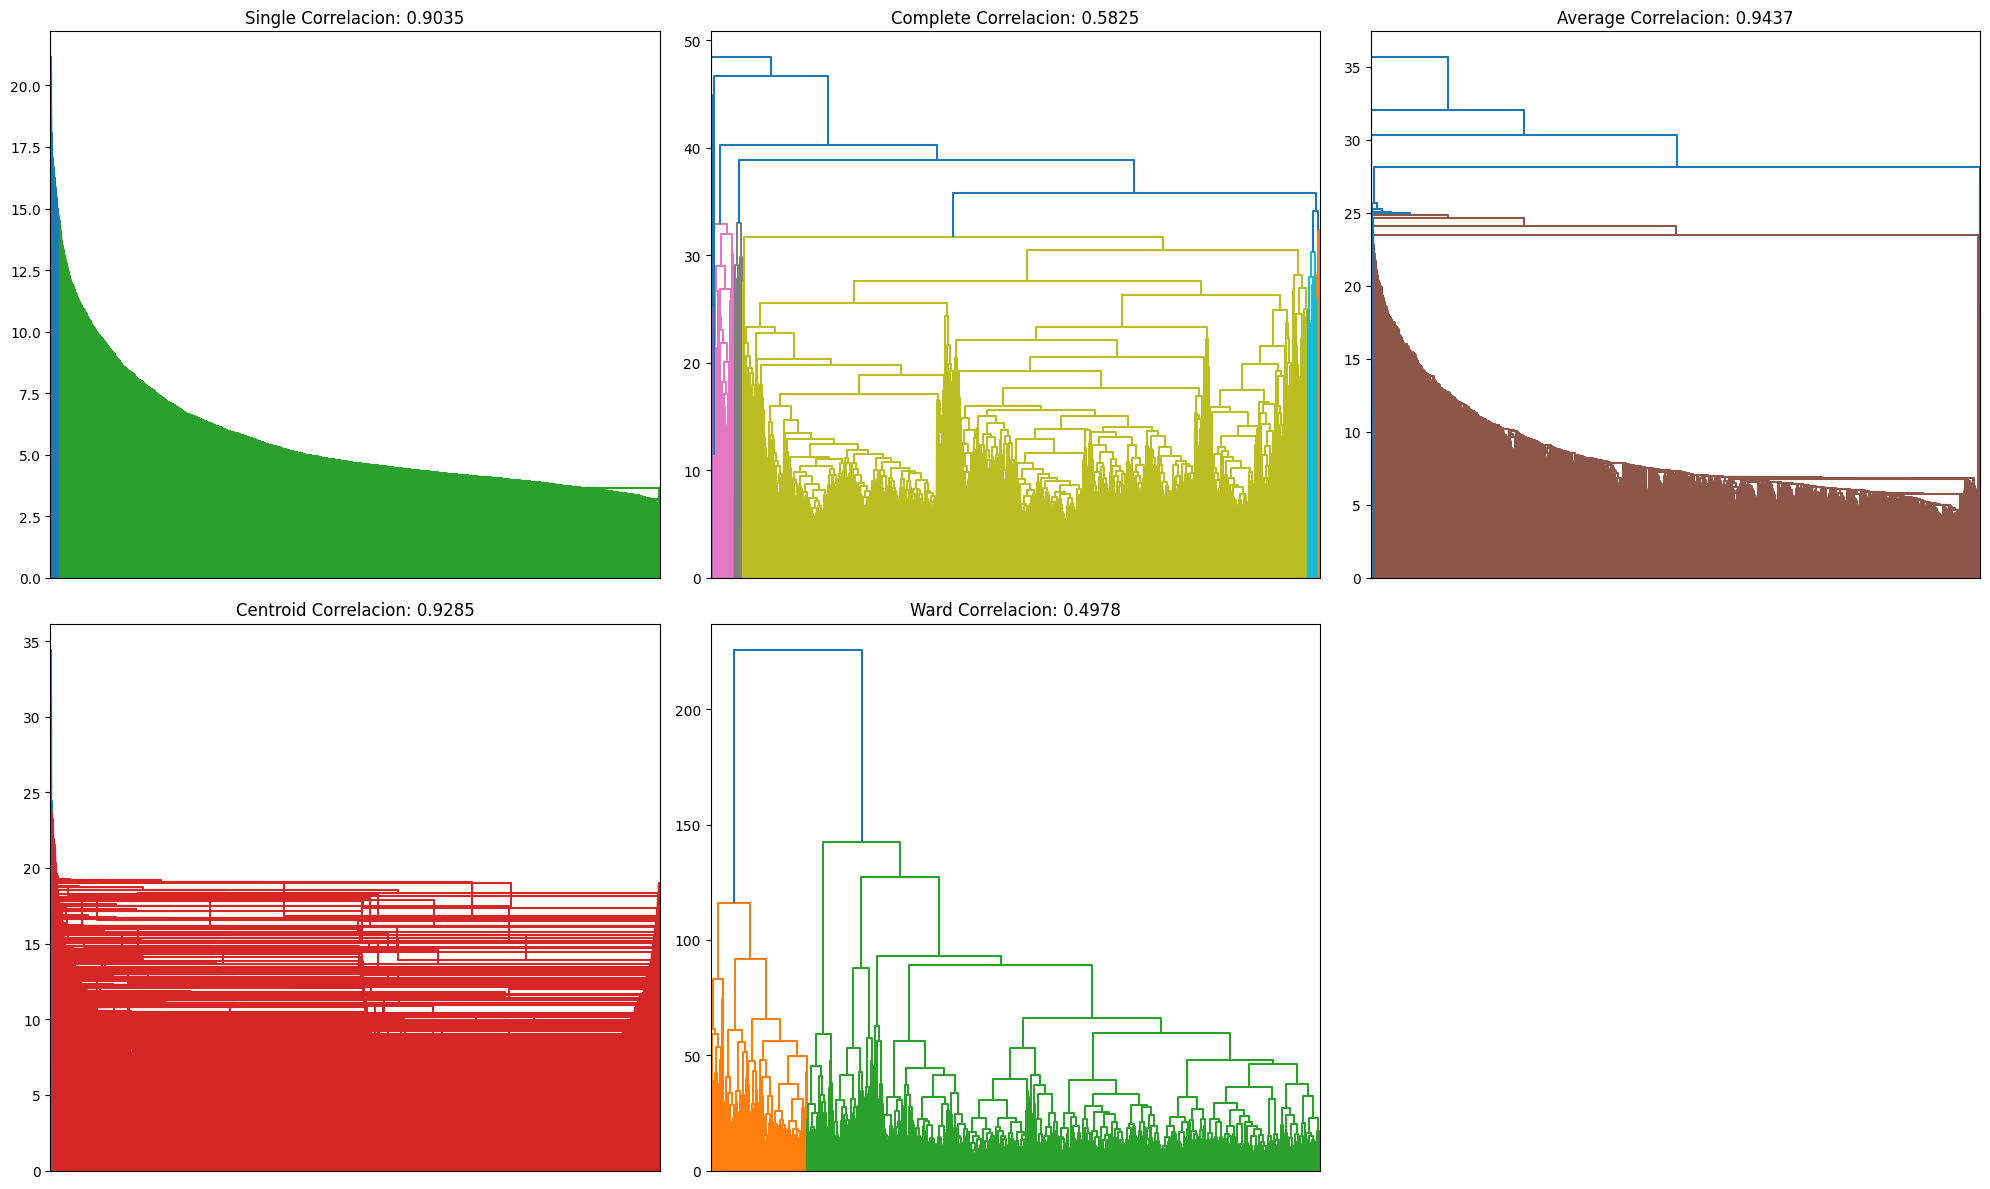

Resultados de Ajuste
- Single    : 0.9035
- Complete  : 0.5825
- Average   : 0.9437
- Centroid  : 0.9285
- Ward      : 0.4978


In [14]:
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist
import sys

sys.setrecursionlimit(100000)


metodos = ['single', 'complete', 'average', 'centroid', 'ward']


dist_genes = pdist(X_genes_scaled, metric='euclidean')

plt.figure(figsize=(20, 12))
res_genes = {}

for i, metodo in enumerate(metodos):
    
    Z = linkage(X_genes_scaled, method=metodo, metric='euclidean')

    c, _ = cophenet(Z, dist_genes)
    res_genes[metodo] = c

    plt.subplot(2, 3, i + 1)
    dendrogram(Z, no_labels=True)
    plt.title(f'{metodo.capitalize()} Correlacion: {c:.4f}')


plt.tight_layout()
plt.show()




print("Resultados de Ajuste")
mejor_metodo = max(res_genes, key=res_genes.get)

for metodo, score in res_genes.items():
    print(f"- {metodo.capitalize():<10}: {score:.4f}")

    

El método Average fue el que mejor ajustó (0.94) porque respeta las distancias reales, mientras que Ward dio el peor resultado (0.49). Los gráficos se ven como bloques sólidos simplemente porque son casi 7,000 líneas encimadas y no se llegan a distinguir las ramas.